In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv(r"C:\Users\Rotimi\Downloads\archive\housing.csv")
# Aim is to get an accuurate prediction of median housing_value

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

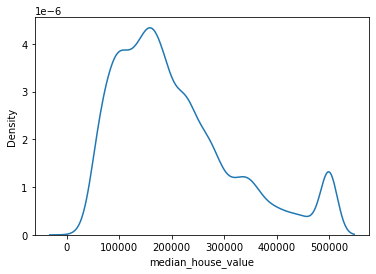

In [4]:
# lets check the distribution of median_house_value
sb.kdeplot(df["median_house_value"])# most of the median_housing_values falls within 190 to 200k dollars

In [5]:
# checking the values of the predictor, we can see that predictor contains continous values , we can partition our bins in such a way that values that falls within the same range clogs  together, this
# will help our model learn better

#df["median_house_value"].value_counts()

df["concat_median"] = pd.cut(df["median_house_value"], bins = 4, labels = [0,1,2,3] )


In [6]:
df["concat_median"]

0        3
1        2
2        2
3        2
4        2
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: concat_median, Length: 20640, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit # Splitting data into training and testing before anything

In [8]:
stratified_ = StratifiedShuffleSplit(n_splits= 10 , random_state= False ,test_size = .2 )
for train_, test_ in stratified_.split(df, df["concat_median"]):
    train_df = df.loc[train_]
    test_df  = df.loc[test_]


In [9]:
train_df.head()# so this is my training data , I need to remove some columns from train_df, like categorical columns in my dataset
# i also need to remove the predictor from the columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,concat_median
2854,-118.95,35.38,30.0,2594.0,478.0,1419.0,480.0,3.7250,83100.0,INLAND,0
8850,-118.41,34.09,37.0,2716.0,302.0,809.0,291.0,15.0001,500001.0,<1H OCEAN,3
15537,-117.11,33.12,46.0,52.0,13.0,59.0,13.0,3.8750,200000.0,<1H OCEAN,1
2656,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,76100.0,NEAR OCEAN,0
13209,-117.72,34.05,8.0,1841.0,409.0,1243.0,394.0,4.0614,107000.0,INLAND,0


In [10]:
train_label = train_df["median_house_value"]
train_df.drop("median_house_value", axis = 1, inplace  = True)

In [11]:
train_df_d = train_df.copy()
# since the ocen proximity is a categorical column
# we can store the series to another series name
cat_col = train_df_d[["ocean_proximity"]]

In [12]:
train_df_d.drop(("ocean_proximity"),inplace = True, axis = 1)
# to drop all the categorical columns that is not needed and the predictor

In [13]:
train_df_d.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,concat_median
2854,-118.95,35.38,30.0,2594.0,478.0,1419.0,480.0,3.7250,0
8850,-118.41,34.09,37.0,2716.0,302.0,809.0,291.0,15.0001,3
15537,-117.11,33.12,46.0,52.0,13.0,59.0,13.0,3.8750,1
2656,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,0
13209,-117.72,34.05,8.0,1841.0,409.0,1243.0,394.0,4.0614,0


In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

In [15]:
class ColumnerTransformer(BaseEstimator,TransformerMixin):
    
    
    
    """trying to define a column transformer that will help design the way our data will be estracted
    """
    
    def __init__(self, data):
        
        "declaring the variables needed in our transformer"
        self.data = data
        
    def fit(self,x, y = None):
        "fit method is needed to compute the best estimate of function for numerical values"
        
        return self
    
    def transform(self,X):
        
        """here , is where you design how we want our data to look like, this means our data would go throigh
            ""our data would go through a transformed process and would return to us in a desired way or based on how it is needed"""
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        return X

In [16]:
Column_trans = ColumnerTransformer(df)

In [17]:
Column_trans.transform(df.loc[np.random.choice(df.shape[0],2000)])


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,concat_median
6846,-118.11,34.06,18.0,2609.0,721.0,2221.0,703.0,2.3224,192300.0,<1H OCEAN,1
9445,-119.90,37.49,13.0,2230.0,443.0,920.0,361.0,3.0000,112000.0,INLAND,0
12719,-121.38,38.61,34.0,2888.0,496.0,1168.0,479.0,3.6053,148600.0,INLAND,1
6419,-118.01,34.15,32.0,6597.0,1579.0,3689.0,1459.0,3.2377,184100.0,INLAND,1
7179,-118.18,34.04,36.0,1807.0,630.0,2118.0,669.0,1.5500,129000.0,<1H OCEAN,0
...,...,...,...,...,...,...,...,...,...,...,...
4587,-118.27,34.05,37.0,350.0,245.0,1122.0,248.0,2.7634,137500.0,<1H OCEAN,1
8254,-118.17,33.77,45.0,2508.0,797.0,1340.0,720.0,2.6786,191100.0,NEAR OCEAN,1
14563,-117.22,32.82,35.0,756.0,135.0,423.0,136.0,3.5234,183900.0,NEAR OCEAN,1
1277,-121.60,37.90,5.0,14684.0,2252.0,4276.0,1722.0,6.9051,340900.0,INLAND,2


In [18]:
#columtran_sample.transformer(sample_train)

In [19]:
# next we import a transformer  that will help us deal with missing values

In [20]:

from sklearn.impute import SimpleImputer

In [21]:
Simputte = SimpleImputer(strategy="median")

In [22]:
# we import a transformer that will help us standardize our scales

In [23]:
from sklearn.preprocessing import StandardScaler
# # rememember we are applying fit and transform on all our numerical columns to  help us compute the estimates of the mean and applying it thereafter
# the standardscaler will help us standardize our scales ie. we probably have diferent different scales in all the column

In [24]:
standard_scal = StandardScaler()
standard_scal.fit_transform(train_df_d)

array([[ 3.08147387e-01, -1.15342664e-01,  1.10353134e-01, ...,
        -4.98937030e-02, -7.82497346e-02, -1.13363200e+00],
       [ 5.78279830e-01, -7.20834086e-01,  6.67731944e-01, ...,
        -5.42899999e-01,  5.86601558e+00,  2.08814624e+00],
       [ 1.22859867e+00, -1.17612609e+00,  1.38436184e+00, ...,
        -1.26806270e+00,  8.30698959e-04, -5.97059195e-02],
       ...,
       [-1.46272085e+00,  9.87684346e-01,  1.54361293e+00, ...,
        -7.82881900e-01,  1.26042385e+00,  2.08814624e+00],
       [ 7.93385293e-01, -7.34915282e-01,  5.88106400e-01, ...,
        -2.63790615e-01,  8.11764195e-02, -5.97059195e-02],
       [ 6.38309261e-01, -6.87977963e-01,  1.06585966e+00, ...,
        -1.02286380e+00,  2.47983414e-01, -5.97059195e-02]])

In [25]:
### Now we are all done with all our nemerical columns
# lets do transform the categorical column as well


In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [27]:
O_E = OrdinalEncoder()
O_E.fit_transform(cat_col)

array([[1.],
       [0.],
       [0.],
       ...,
       [4.],
       [0.],
       [0.]])

In [28]:
# now we are done with all our done with how we transform our numerical and categorical columns
# what is left now is to design pipeline that will help us hold the numerical cols from categorical cols
from sklearn.pipeline import Pipeline

In [29]:
pipeline_obj = Pipeline([("simpleImp", SimpleImputer(strategy = "median")),("col_trans", Column_trans),
          ("Standardizer", StandardScaler()),])
numerical_pipe = pipeline_obj.fit_transform(train_df_d)

In [30]:
# we need a pipeline that will handle  numerical and categorical columns seperately

In [31]:
from sklearn.compose import ColumnTransformer

In [32]:
train_df_d.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'concat_median'],
      dtype='object')

In [33]:
df.columns[-2]

'ocean_proximity'

In [34]:
# we need to store the numerical columns in a list  while the categorical colums will need to be stored to 

Numerical_cols = list(train_df_d.columns)
Categorical_cols = ["ocean_proximity"]

# i can use Featuree


In [35]:
Full_pipleine_obj = ColumnTransformer([("numerical_trans", pipeline_obj, Numerical_cols),
                     ("cate_col",OneHotEncoder(), Categorical_cols )])

In [36]:

Numerical_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'concat_median']

In [37]:
train_df.shape

(16512, 10)

In [38]:
Full_pipleine_obj.fit_transform(train_df)

array([[ 0.30814739, -0.11534266,  0.11035313, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57827983, -0.72083409,  0.66773194, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.22859867, -1.17612609,  1.38436184, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.46272085,  0.98768435,  1.54361293, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.79338529, -0.73491528,  0.5881064 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63830926, -0.68797796,  1.06585966, ...,  0.        ,
         0.        ,  0.        ]])

In [39]:
traind_data= Full_pipleine_obj.fit_transform(train_df)# Now we apply all the transformation on our columns
# so that we can have a full transformation of our training data
# next we fit our model on it and see how our data perform

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
Lr = LinearRegression()
Lr_obj = LinearRegression().fit(traind_data, train_label)# here we train our model on train_set


In [42]:
test_label = test_df["median_house_value"]# lets get our test data  ready for testing
test_df.drop(["median_house_value"], axis =1, inplace = True)

In [43]:
some_test_df = test_df.iloc[:10,:]
some_test_labels = test_label[:10]

In [44]:
Predict_values = Lr_obj.predict(Full_pipleine_obj.transform(some_test_df))# the prediction for the first 10 values of testing_data

In [45]:
some_test_labels.mean() - Lr_obj.predict(Full_pipleine_obj.transform(some_test_df)).mean()# here have 12k off

-12847.69464189175

In [46]:
Predict_values.mean(), some_test_labels.mean()

(247927.89464189176, 235080.2)

In [47]:
# lets evaluate our model using mean squared error - works for regression models
# we have other types of evaluating model such as f1 , confussion matrix( classification model)

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
train_error = np.sqrt(mean_squared_error(Predict_values, some_test_labels))# to read on mean squared error

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
D_r = DecisionTreeRegressor(random_state= 42)


##### Lets create a function that will help us fit and predict trained data 

In [52]:
def Model_fit(Md):
    Md_fit = Md.fit(traind_data, train_label)
    return Md_fit.predict(Full_pipleine_obj.transform(some_test_df))
    

In [53]:
def Evaluation_model(Model):
    Md_fit = Model.fit(traind_data, train_label)
    score_value = np.sqrt(mean_squared_error(Md_fit.predict(traind_data), train_label))
    print(f" The mean_score_error of {Model} is : {score_value:.3f}")
  

In [54]:
Evaluation_model(Lr), Evaluation_model(D_r)# Linear regession model is far off by 32k , while Decision_tress
# contains no erro, How possible could that be , it shows our Decisiontree model is overfitting

# Lets check one for model and see how it does well in prediction

 The mean_score_error of LinearRegression() is : 32807.695
 The mean_score_error of DecisionTreeRegressor(random_state=42) is : 0.000


(None, None)

In [55]:
#lets import a model 
from sklearn.ensemble import RandomForestRegressor


In [56]:
R_f  = RandomForestRegressor()

In [57]:
Model_fit(R_f).mean()-some_test_labels.mean()# RandomForestRegressor perfroms better here than our previous model
# since the Decision tree overfits , lets try and see how models works on unseen data 

7032.268999999971

In [58]:
Evaluation_model(R_f)

 The mean_score_error of RandomForestRegressor() is : 9319.817


In [59]:
#### To see how our model works on  unseen data , we import cross_val_score

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
Scores = cross_val_score(R_f, traind_data, train_label, cv = 10,scoring= "neg_mean_squared_error")

In [62]:
np.sqrt(-Scores).mean()

D_r_scores = cross_val_score(D_r, traind_data, train_label, cv = 10,scoring= "neg_mean_squared_error")

In [63]:
np.sqrt(-D_r_scores).mean(),np.sqrt(-Scores).mean()# the Random Forest does well

(35238.22448775986, 24965.74420837253)

##### Lets Fine tune our model now

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
Param_grid = {"n_estimators" : [10, 30, 34], "max_features" : [2,4] ,
             "bootstrap" : [True] , "n_estimators" : [3,10,13,38], "max_features" : [2,6,8]}

In [66]:
Grid_obj = GridSearchCV(R_f, param_grid = Param_grid,scoring= "neg_mean_squared_error", cv = 5, return_train_score= True )

In [67]:
 Grid_results = Grid_obj.fit(traind_data, train_label)

In [68]:
Grid_results


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_features': [2, 6, 8],
                         'n_estimators': [3, 10, 13, 38]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [69]:
for i , j in zip(Grid_results.cv_results_["params"], Grid_results.cv_results_["mean_test_score"]):
    print(i,np.sqrt(-j))

{'bootstrap': True, 'max_features': 2, 'n_estimators': 3} 38517.80864064796
{'bootstrap': True, 'max_features': 2, 'n_estimators': 10} 31573.08378650137
{'bootstrap': True, 'max_features': 2, 'n_estimators': 13} 30179.524526246092
{'bootstrap': True, 'max_features': 2, 'n_estimators': 38} 28060.70878957248
{'bootstrap': True, 'max_features': 6, 'n_estimators': 3} 29818.87261212377
{'bootstrap': True, 'max_features': 6, 'n_estimators': 10} 26553.08082984342
{'bootstrap': True, 'max_features': 6, 'n_estimators': 13} 26326.229452032276
{'bootstrap': True, 'max_features': 6, 'n_estimators': 38} 25446.95255448527
{'bootstrap': True, 'max_features': 8, 'n_estimators': 3} 29491.90768107417
{'bootstrap': True, 'max_features': 8, 'n_estimators': 10} 26322.41120435271
{'bootstrap': True, 'max_features': 8, 'n_estimators': 13} 26079.26907134239
{'bootstrap': True, 'max_features': 8, 'n_estimators': 38} 25411.602087596384


*  from here , it shows my model performs better at the combination of max_features of 6 , n_estimators of 38 and mean_test_score slighly over 25k

In [70]:
best_model = Grid_results.best_estimator_# n_estimators of 38 , tyhe randomstate is evaluated at all this level

In [71]:
best_model.predict(Full_pipleine_obj.transform(test_df)).mean()

207253.67225749695

In [72]:
test_label.mean()

206346.8703972868

In [73]:
Evaluation_model(best_model)

 The mean_score_error of RandomForestRegressor(max_features=8, n_estimators=38) is : 9647.957


In [74]:
# Now lets look another hyperparameter tuner
# Here we use RandomisedSearchCv
from sklearn.model_selection import RandomizedSearchCV

In [75]:
Randomized_search  = RandomizedSearchCV(R_f,Param_grid, cv = 5 , scoring= "neg_mean_squared_error", return_train_score= False)

In [76]:
Random_results = Randomized_search.fit(traind_data, traind_data)

In [77]:
Grid_best_features = Grid_results.best_estimator_.feature_importances_

In [78]:
cate_vals = list(Full_pipleine_obj.named_transformers_["cate_col"].categories_[0])
cate_vals

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [79]:
Numerical_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'concat_median']

In [80]:
Attributes_ = Numerical_cols + cate_vals

In [81]:
sorted(zip(Grid_best_features, Attributes_), reverse = True)

[(0.7277991931197875, 'concat_median'),
 (0.1262470863558129, 'median_income'),
 (0.07039406857701257, 'INLAND'),
 (0.016942432657369513, 'latitude'),
 (0.01622999717351469, 'longitude'),
 (0.008403746318345225, 'population'),
 (0.007958319060224256, 'housing_median_age'),
 (0.006982352415647086, 'total_rooms'),
 (0.006161969216706942, '<1H OCEAN'),
 (0.005940580784868506, 'households'),
 (0.005897380198029283, 'total_bedrooms'),
 (0.0007327938649652973, 'NEAR OCEAN'),
 (0.0003050246529691003, 'NEAR BAY'),
 (5.055604747100541e-06, 'ISLAND')]

In [82]:
test_label

19548     74900.0
20391    264600.0
18052    500001.0
1895     107200.0
9633     123400.0
           ...   
18453    217100.0
266      143900.0
5729     366700.0
9865     142100.0
10252    184600.0
Name: median_house_value, Length: 4128, dtype: float64

In [83]:
final_model = Grid_results.best_estimator_
final_model

RandomForestRegressor(max_features=8, n_estimators=38)

In [84]:
Final_predict = final_model.predict(Full_pipleine_obj.transform(test_df))

In [85]:
Final_predict[:5]

array([ 70305.26315789, 282805.26315789, 485308.68421053,  98105.26315789,
        97234.21052632])

In [86]:
test_label[:5]

19548     74900.0
20391    264600.0
18052    500001.0
1895     107200.0
9633     123400.0
Name: median_house_value, dtype: float64

In [87]:
np.sqrt(mean_squared_error(Final_predict, test_label))

24982.202867555035

In [88]:
rmse = mean_squared_error(test_label, Final_predict)
rmse

624110460.1156751

In [89]:
(Final_predict -test_label)**2 

19548    2.111161e+07
20391    3.314316e+08
18052    2.158641e+08
1895     8.271424e+07
9633     6.846485e+08
             ...     
18453    2.016400e+08
266      1.472742e+09
5729     4.536377e+09
9865     1.150459e+09
10252    1.057961e+07
Name: median_house_value, Length: 4128, dtype: float64

In [90]:
from scipy import stats
confidence = 0.95
squared_errors = (Final_predict -test_label)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

# here , computing the confidenec intervals gives us the probability or point estimate  which is the mean error will value 
# between 24k to slightly 25k

array([24344.12426781, 25604.38505149])

In [91]:
# how do we create a pipeline that help us select the important features 

In [92]:
from sklearn.svm import SVR

In [93]:
svm = SVR(kernel = "poly", C = 1.0 , gamma="scale")
svm_ = SVR()

In [94]:
Model_fit(svm)

array([179164.64112143, 180324.61340137, 197599.3698993 , 178990.80396981,
       179483.91421079, 184965.34512922, 181286.94708971, 178836.39952428,
       181210.69140612, 179862.408542  ])

In [95]:
Evaluation_model(svm)# the SVM is not doing well in training, this shows that the the data points are widely dispersed around the center 

 The mean_score_error of SVR(kernel='poly') is : 117046.130


In [96]:
#Remember we have a lot of parameters, Gridsearch is used to search the best parameter combination inorder to help improve you model

# The essence is to help fine tune your model

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
Param_grid

{'n_estimators': [3, 10, 13, 38],
 'max_features': [2, 6, 8],
 'bootstrap': [True]}

In [99]:
#R_cv_model = R_cv.fit(traind_data,train_label)

####  Creating a pipeline that will contain the Data processing and the model

In [100]:
pipeline_model = Pipeline([("Data_processing", Full_pipleine_obj),("Linear_regression_model",LinearRegression())])

In [101]:
df_label = df["median_house_value"].copy()
df.drop("median_house_value",axis =1 , inplace= True)

In [102]:
df.shape

(20640, 10)

In [103]:
pipeline_model.fit(df,df_label)

Pipeline(steps=[('Data_processing',
                 ColumnTransformer(transformers=[('numerical_trans',
                                                  Pipeline(steps=[('simpleImp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('col_trans',
                                                                   ColumnerTransformer(data=       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1...
20638       741.0       349.0         1.8672          INLAND             0  
20639      1387.0       530.0         2.3886          INLAND             0  

[20640 rows 

In [104]:
train_df_d

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,concat_median
2854,-118.95,35.38,30.0,2594.0,478.0,1419.0,480.0,3.7250,0
8850,-118.41,34.09,37.0,2716.0,302.0,809.0,291.0,15.0001,3
15537,-117.11,33.12,46.0,52.0,13.0,59.0,13.0,3.8750,1
2656,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,0
13209,-117.72,34.05,8.0,1841.0,409.0,1243.0,394.0,4.0614,0
...,...,...,...,...,...,...,...,...,...
2994,-119.04,35.32,20.0,37.0,11.0,34.0,8.0,1.2000,0
16516,-121.21,37.81,18.0,2404.0,498.0,1531.0,506.0,2.9950,0
16078,-122.49,37.73,48.0,1190.0,182.0,497.0,199.0,6.2642,3
6242,-117.98,34.06,36.0,2391.0,407.0,1967.0,398.0,4.0274,1


In [105]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,concat_median
2854,-118.95,35.38,30.0,2594.0,478.0,1419.0,480.0,3.7250,INLAND,0
8850,-118.41,34.09,37.0,2716.0,302.0,809.0,291.0,15.0001,<1H OCEAN,3
15537,-117.11,33.12,46.0,52.0,13.0,59.0,13.0,3.8750,<1H OCEAN,1
2656,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417,NEAR OCEAN,0
13209,-117.72,34.05,8.0,1841.0,409.0,1243.0,394.0,4.0614,INLAND,0
...,...,...,...,...,...,...,...,...,...,...
2994,-119.04,35.32,20.0,37.0,11.0,34.0,8.0,1.2000,INLAND,0
16516,-121.21,37.81,18.0,2404.0,498.0,1531.0,506.0,2.9950,INLAND,0
16078,-122.49,37.73,48.0,1190.0,182.0,497.0,199.0,6.2642,NEAR OCEAN,3
6242,-117.98,34.06,36.0,2391.0,407.0,1967.0,398.0,4.0274,<1H OCEAN,1


In [106]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,concat_median
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,2
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,0


In [107]:
pipeline_fit = pipeline_model.fit(train_df,train_label)
pipeline_fit.predict(some_test_df)

array([ 79558.41251643, 319071.84646857, 509900.01386423,  68881.52735132,
        90222.63009979, 461977.93778002, 335259.24613043,  83223.88843193,
       318179.91516949, 213003.5286067 ])

In [108]:
# train_label.shape
train_df.shape

(16512, 10)

In [109]:
pipeline_fit = pipeline_model.fit(train_df,train_label )
pipeline_fit.predict(some_test_df)

array([ 79558.41251643, 319071.84646857, 509900.01386423,  68881.52735132,
        90222.63009979, 461977.93778002, 335259.24613043,  83223.88843193,
       318179.91516949, 213003.5286067 ])

***a function that select the best n features for the predicted vector***

In [131]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])#sorting the most correlated features


In [146]:
Cat_features = []
best_indices = indices_of_top_k(Grid_best_features,k)
for i in best_indices:
    Cat_features.append((Attributes_[i],Grid_best_features[i]))
print(Cat_features)
    

[('longitude', 0.01622999717351469), ('latitude', 0.016942432657369513), ('median_income', 0.1262470863558129), ('concat_median', 0.7277991931197875), ('INLAND', 0.07039406857701257)]
